In [3]:
#custom generator
from skimage.io import imread
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D,Reshape
from keras.models import Model
from keras.layers import Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras import applications


#dimension of target image
IMG_HEIGHT = 576
IMG_WIDTH = 720
BATCH_SIZE = 4

############
# Encoding #
############

input_img = Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3))
# Conv1 #
x = Conv2D(filters = 16, kernel_size = (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D(pool_size = (2, 2), padding='same')(x)

# Conv2 #
x = Conv2D(filters = 8, kernel_size = (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size = (2, 2), padding='same')(x) 

# Conv 3 #
x = Conv2D(filters = 8, kernel_size =(3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D(pool_size = (2, 2), padding='same')(x)

# Note:
# padding is a hyper-arameter for either 'valid' or 'same'. 
# "valid" means "no padding". 
# "same" results in padding the input such that the output has the same length as the original input.

############
# Decoding #
############

# DeConv1
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)

# DeConv2
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

# Deconv3
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

# Declare the model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.summary()

def load_img(path):
    img = imread(path)
    img = img/ 255
    return img

def img_generator(df,batch_size):
    while True:
        X_batch_input = []
        y_batch_input = []
        degraded_path =  'C:/Users/Mathieu/CESI/Projet/dataset_clean_degraded/degraded/'
        clean_path =  'C:/Users/Mathieu/CESI/Projet/dataset_clean_degraded/clean/'
        batch_path = np.random.choice(a = df['picName'], size= batch_size)
        for img_name in batch_path:
            current_X = load_img(degraded_path+img_name)
            current_y = load_img(clean_path+img_name)
            X_batch_input += [ current_X ]
            y_batch_input += [ current_y ]
        batch_X = np.array(X_batch_input)
        batch_y = np.array(y_batch_input)
        yield (batch_X, batch_y)
    
df = pd.read_csv('C:/Users/Mathieu/CESI/Projet/index.csv')
gen = img_generator(df, BATCH_SIZE)

STEPS_PER_EPOCH = np.ceil(5500/BATCH_SIZE)
history = autoencoder.fit_generator(gen, steps_per_epoch=STEPS_PER_EPOCH, epochs=2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 576, 720, 3)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 576, 720, 16)      448       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 288, 360, 16)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 288, 360, 8)       1160      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 144, 180, 8)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 144, 180, 8)       584       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 72, 90, 8)         0         
__________

KeyboardInterrupt: 

In [29]:
model = pickle.load( open("C:/Users/Mathieu/CESI/Pickle/collab/VGG/model-save-pickle-VGG.p", "rb"))
history = pickle.load ( open ("C:/Users/Mathieu/CESI/Pickle/collab/VGG/history-save-pickle-VGG.p","rb"))

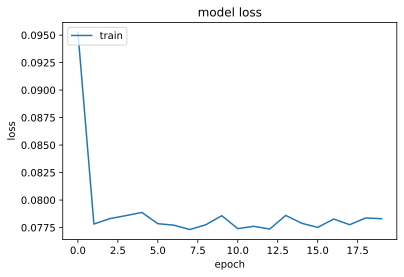

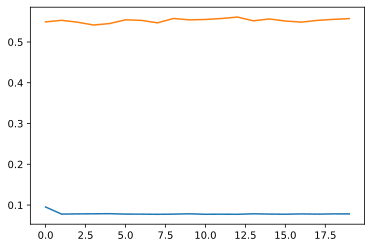

In [30]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['acc'])

KeyError: 'val_acc'

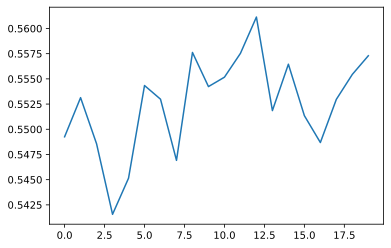

In [31]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()



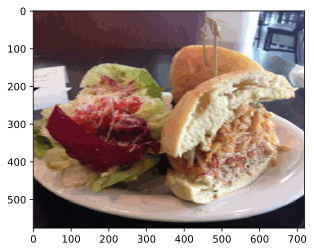

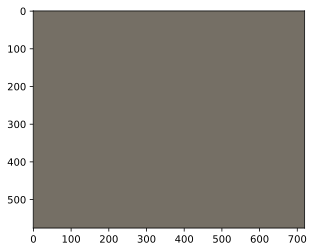

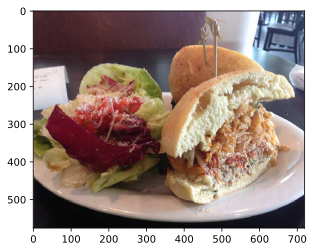

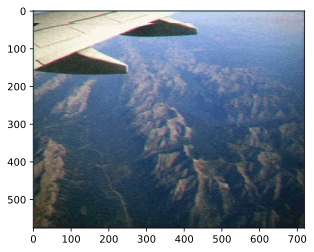

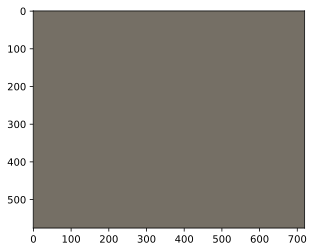

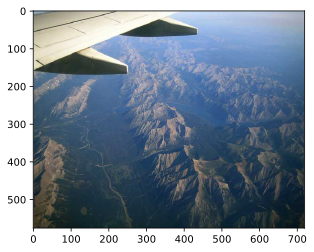

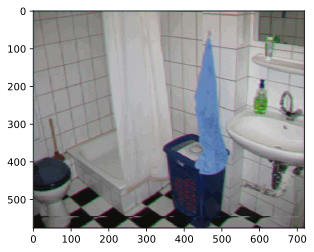

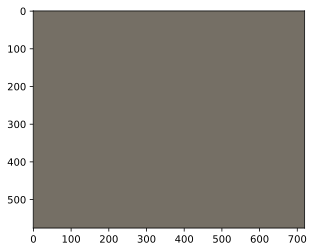

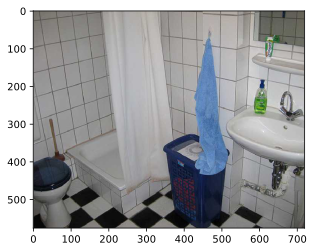

In [32]:
import matplotlib as mpl
mpl.rcParams['figure.dpi']= dpi

x,y = next(gen)
y_pred = model.predict(x)
for i in range(3):
    plt.imshow(x[i])
    plt.show()
    plt.imshow(y_pred[i])
    plt.show()
    plt.imshow(y[i])
    plt.show()

In [6]:
import pickle
pickle.dump( autoencoder , open( "model-save-pickle-autoEnc.p", "wb"))
pickle.dump( history , open( "history-save-pickle-autoEnc.p", "wb"))

NameError: name 'history' is not defined